In [1]:
import pandas as pd
from data_preprocessing import get_cleaned_data
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
data = get_cleaned_data(convert_categorical=False)

# show histogram of each column
for col in data.columns:
    print(col)
    # histogram
    plt.figure()
    data[col].hist()
    plt.title(col)
    plt.show()
    # boxplot
    plt.figure()
    sns.boxplot(data[col])
    plt.title(col)
    plt.show()

KeyError: "['EXT_SOURCE_1', 'EXT_SOURCE_3'] not found in axis"

In [ ]:
numerical_categories = data.columns[data.dtypes != 'object']
print(numerical_categories)

Index(['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')


<AxesSubplot:>

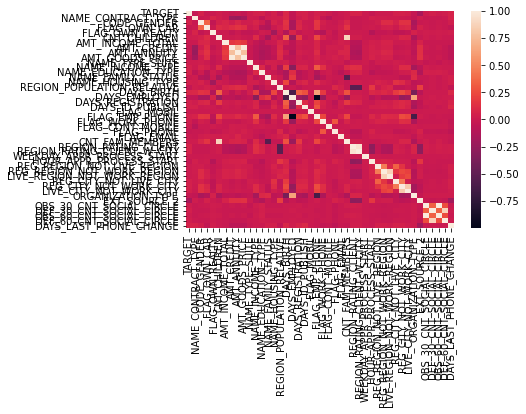

In [ ]:
data = get_cleaned_data(convert_categorical=True)

corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [ ]:
# print columns with high correlation
cols_description = pd.read_csv('../data/columns_description.csv')
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.7:
            colname = corr.columns[i] + ' and ' + corr.columns[j] + " : " +str(corr.iloc[i, j])
            print(colname)
            print(corr.columns[i] + " : " + cols_description[cols_description['Row'] == corr.columns[i]]['Description'].values[0])
            print(corr.columns[j] + " : " + cols_description[cols_description['Row'] == corr.columns[j]]['Description'].values[0])

DAYS_EMPLOYED and DAYS_BIRTH : -0.6158641964711599
DAYS_EMPLOYED : How many days before the application the person started current employment
DAYS_BIRTH : Client's age in days at the time of application
FLAG_EMP_PHONE and DAYS_BIRTH : 0.6198876962023361
FLAG_EMP_PHONE : Did client provide work phone (1=YES, 0=NO)
DAYS_BIRTH : Client's age in days at the time of application
ORGANIZATION_TYPE and DAYS_EMPLOYED : 0.630479325898196
ORGANIZATION_TYPE : Type of organization where client works
DAYS_EMPLOYED : How many days before the application the person started current employment
ORGANIZATION_TYPE and FLAG_EMP_PHONE : -0.6308377720723761
ORGANIZATION_TYPE : Type of organization where client works
FLAG_EMP_PHONE : Did client provide work phone (1=YES, 0=NO)


In [ ]:
high_corr_cols = ['REGION_RATING_CLIENT', 
                  'AMT_GOODS_PRICE', 
                  'OBS_30_CNT_SOCIAL_CIRCLE', 
                  'DEF_30_CNT_SOCIAL_CIRCLE',
                  'REG_CITY_NOT_WORK_CITY',
                  'CNT_CHILDREN',
                  'REG_REGION_NOT_WORK_REGION']
